In [1]:
# K - MEANS

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import mall dataset with pandas
dataset = pd.read_csv('Mall_Customers.csv')

X = dataset.iloc[:,[3,4]].values

In [2]:
# Import the KMeans class from scikit-learn
from sklearn.cluster import KMeans

# Specify the number of clusters (k = 2)
n_clusters = 2

# Initialize the K-Means model and create an empty list to store WCSS values
wcss = []

# Loop through different numbers of clusters (from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,           # Number of clusters
        init='k-means++',       # Smart initialization method
        max_iter=300,           # Maximum number of iterations for each run
        n_init=10,              # Number of times to run K-Means with different initial centroids
        random_state=0          # Random seed for reproducibility
    )
    kmeans.fit(X)  # Fit the K-Means model to your data
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list


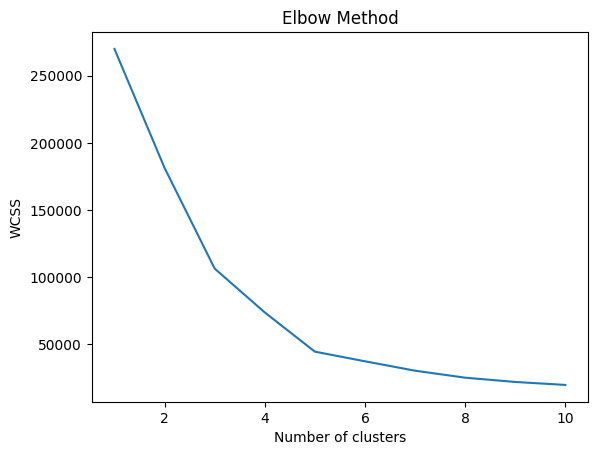

In [3]:
# Create a plot of the WCSS values for different values of k
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

In [4]:
kmeans = KMeans(
    n_clusters=5,           # Number of clusters (by elbow point analysis)
    init='k-means++',       # Smart initialization method
    max_iter=300,           # Maximum number of iterations for each run
    n_init=10,              # Number of times to run K-Means with different initial centroids
    random_state=0          # Random seed for reproducibility
)


In [5]:
y_kmeans = kmeans.fit_predict(X)


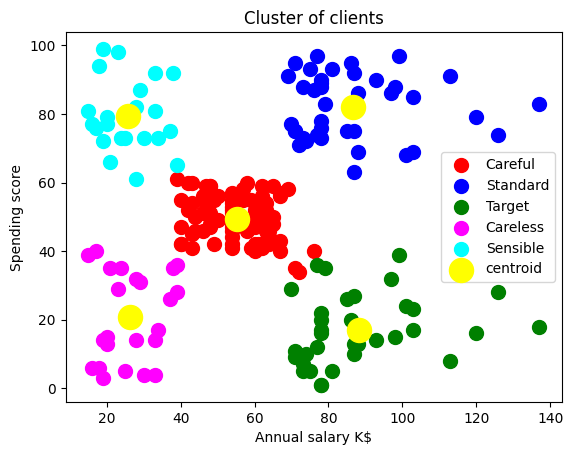

In [6]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='magenta', label='Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='cyan', label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='centroid')
plt.title('Cluster of clients')
plt.xlabel('Annual salary K$')
plt.ylabel('Spending score')
plt.legend()
plt.show()
